In [2]:
# how to find out if two or more time series are similar or not.

In [3]:
# rice production data 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

data = pd.read_csv('rice production across different countries from 1961 to 2021.csv')
selected = ['United States of America', 'Bangladesh', 'France']
data = data.loc[data['Area'].isin(selected)]


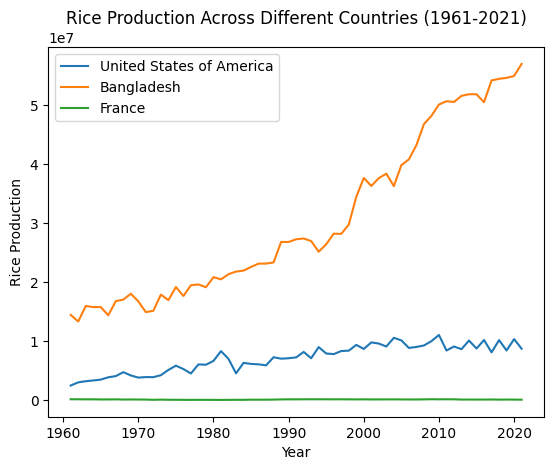

In [4]:
# data = data.loc[data['Area'].isin(['France'])]
# print(data)

#Without using log scale
# Extract relevant data for the selected countries
selected_countries = ['United States of America', 'Bangladesh', 'France']
selected_data = data[data['Area'].isin(selected_countries)]

# Plotting timeseries for each pair
for country in selected_countries:
    country_data = selected_data[selected_data['Area'] == country]
    plt.plot(country_data['Year'], country_data['Value'], label=country)


plt.xlabel('Year')
plt.ylabel('Rice Production')
plt.title('Rice Production Across Different Countries (1961-2021)')
plt.legend()
plt.show()

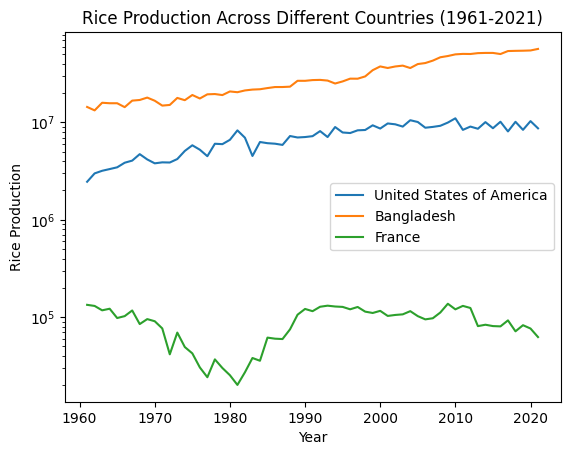

In [5]:

# using log scale
# Extract relevant data for the selected countries


selected_countries = ['United States of America', 'Bangladesh', 'France']
selected_data = data[data['Area'].isin(selected_countries)]

# Plotting timeseries for each pair
for country in selected_countries:
    country_data = selected_data[selected_data['Area'] == country]
    plt.plot(country_data['Year'], country_data['Value'], label=country)

plt.yscale('log') 
plt.xlabel('Year')
plt.ylabel('Rice Production')
plt.title('Rice Production Across Different Countries (1961-2021)')
plt.legend()
plt.show()


In [6]:
#Scaling

#Scaling is the process of subtracting the mean of the time series from each value and 
#then dividing the result by the standard deviation of the series.
#Why scaling?
scaled = dict()
for area in data['Area'].unique():
    series = data[data['Area']==area]['Value'].values
    scaled[area] = (series - series.mean()) / series.std()
scaled = pd.DataFrame(scaled)

In [7]:
data

,Area,Year,Unit,Value,Flag,Flag Description
422,Bangladesh,1961,tonnes,14426184.0,A,Official figure
423,Bangladesh,1962,tonnes,13304520.0,A,Official figure
424,Bangladesh,1963,tonnes,15934944.0,A,Official figure
425,Bangladesh,1964,tonnes,15753588.0,A,Official figure
426,Bangladesh,1965,tonnes,15750540.0,A,Official figure
...,...,...,...,...,...,...
6929,United States of America,2017,tonnes,8084290.0,A,Official figure
6930,United States of America,2018,tonnes,10152890.0,A,Official figure
6931,United States of America,2019,tonnes,8396180.0,A,Official figure
6932,United States of America,2020,tonnes,10319860.0,A,Official figure


In [8]:
#Detrending

#Detrending is the process of removing any trend from the time series.
#why detrending?
#we want to measure the similarity of the underlying patterns, not the trend
from scipy.signal import detrend

detrended = dict()
for area in selected:
    detrended[area] = detrend(scaled[area])
detrended = pd.DataFrame(detrended, index=sorted(data['Year'].unique()))

In [9]:
print(np.shape(detrended))

print(detrended)


(61, 3)
      United States of America  Bangladesh    France
1961                 -0.435231    0.471565  1.673522
1962                 -0.255418    0.335437  1.560228
1963                 -0.225113    0.471952  1.170618
1964                 -0.220229    0.404151  1.292104
1965                 -0.211467    0.349307  0.571681
...                        ...         ...       ...
2017                 -0.922477    0.299053 -0.175267
2018                 -0.083193    0.263905 -0.808612
2019                 -0.892075    0.221660 -0.491820
2020                 -0.115230    0.190257 -0.687302
2021                 -0.865270    0.283772 -1.110495

[61 rows x 3 columns]


In [10]:
time=np.linspace(0,61,61)

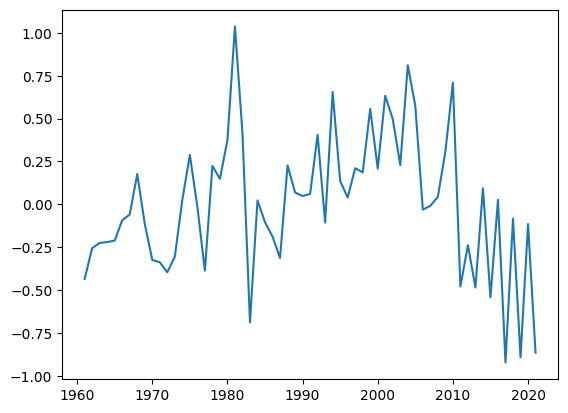

In [18]:
plt.plot(data['Year'].unique(),detrended['United States of America'])

In [12]:
#Smoothing

#Smoothing is the process of removing noise from the time series.
smoothed = detrended.rolling(3).mean().dropna()

print(smoothed.keys())

Index(['United States of America', 'Bangladesh', 'France'], dtype='object')


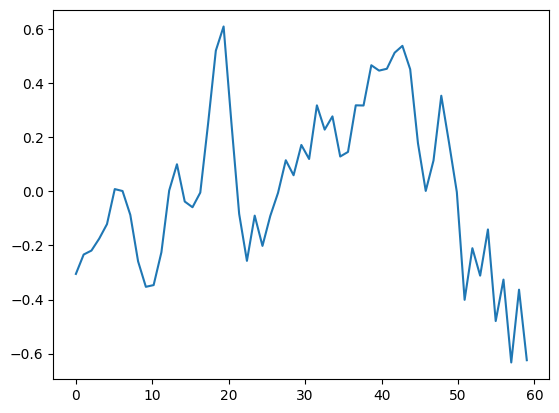

In [13]:
time=np.linspace(0,59,59)
plt.plot(time,smoothed['United States of America'])

In [14]:
smoothed.corr()

,United States of America,Bangladesh,France
United States of America,1.000000,-0.509552,0.146377
Bangladesh,-0.509552,1.000000,0.112580
France,0.146377,0.112580,1.000000


In [15]:
from sklearn.metrics.pairwise import euclidean_distances

euc_dist = euclidean_distances(smoothed.T)
pd.DataFrame(euc_dist, index=selected, columns=selected)

,United States of America,Bangladesh,France
United States of America,0.000000,3.731002,7.13253
Bangladesh,3.731002,0.000000,7.15415
France,7.132530,7.154150,0.00000
